In [4]:
#Khởi tạo mội trường cho pyspark
import findspark
findspark.init()

In [6]:
#Khởi tạo spark context và session
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [7]:
sc = SparkContext(master='local',appName='Ex_Chapter4')
spark = SparkSession(sc)

### 1. Đọc tập tin Fifa2018_dataset.csv vào fifa_df

In [12]:
file_name = 'Fifa2018_dataset.csv'
fifa_df = spark.read.csv(file_name,inferSchema=True,header=True)

### 2. In schema của fifa_df. Hiển thị 2 dòng đầu tiên, cho biết dữ liệu có bao nhiêu dòng

In [13]:
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [15]:
fifa_df.head(2)

[Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, L

In [17]:
print('Number of lines is :',fifa_df.count()) #Dữ liệu có 17981 dòng

Number of lines is : 17981


### 3. Tạo view 'fifa_table' từ fifa_df

In [18]:
fifa_df.createOrReplaceTempView('fifa_table')

### 4. Dùng SQL Query lấy cột Age của VĐV có Nationality là *Germani* => *fifa_germany_age* . Hiển thị 3 dòng đầu. In thống kê dữ liệu

In [20]:
fifa_germany_age = spark.sql('select Age from fifa_table where Nationality == "Germany"')

In [21]:
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



In [44]:
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293756|
|    min|               16|
|    max|               36|
+-------+-----------------+



### 5. Trực quan hóa dữ liệu fifa_germany_age. Nhận xét biểu đồ

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
ff_plot = fifa_germany_age.toPandas()

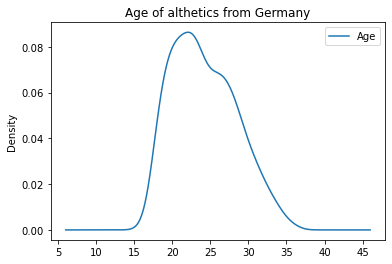

In [31]:
ff_plot.plot(kind='kde',title = 'Age of althetics from Germany');

##### Nhận xét: 
- Phần lớn lứa tuổi của các vận động viên Đức là từ khoảng 25-30 tuổi.
- Range tuổi các VĐV kéo dài từ 15-35 tuổi.
- Phân phối khá chuẩn với mean là 25, lệch chuẩn 10

### 6. Từ fifa_df, cho biết mỗi độ tuổi có bao nhiêu cầu thủ. Độ tuổi trung bình của cầu thủ mỗi quốc gia là bao nhiều?

In [39]:
#Số cầu thủ theo độ tuổi:
fifa_df.groupby('Age').count().orderBy('Age').show(50)

+---+-----+
|Age|count|
+---+-----+
| 16|   13|
| 17|  258|
| 18|  672|
| 19| 1069|
| 20| 1245|
| 21| 1286|
| 22| 1324|
| 23| 1394|
| 24| 1334|
| 25| 1522|
| 26| 1202|
| 27| 1152|
| 28| 1051|
| 29| 1121|
| 30|  804|
| 31|  671|
| 32|  506|
| 33|  617|
| 34|  272|
| 35|  191|
| 36|  136|
| 37|   69|
| 38|   36|
| 39|   20|
| 40|    8|
| 41|    3|
| 43|    2|
| 44|    2|
| 47|    1|
+---+-----+



In [42]:
#cầu thủ trung bình mỗi quốc gia:
fifa_df.groupby('Nationality').agg({'Age':'mean'}).show()

+--------------+------------------+
|   Nationality|          avg(Age)|
+--------------+------------------+
|          Chad|              25.0|
|        Russia| 25.23202614379085|
|      Paraguay| 26.10144927536232|
|       Senegal|25.046511627906977|
|        Sweden|25.119565217391305|
|        Guyana|              28.0|
|       Eritrea|              32.0|
|   Philippines|25.666666666666668|
|          Fiji|              29.0|
|        Turkey|25.127147766323024|
|          Iraq|              26.0|
|       Germany| 24.20263157894737|
|St Kitts Nevis|26.666666666666668|
|       Comoros| 27.11111111111111|
|   Afghanistan|              22.0|
|   Ivory Coast| 24.10891089108911|
|         Sudan|              22.5|
|        France|24.634969325153374|
|        Greece|24.418367346938776|
|        Kosovo|           23.9375|
+--------------+------------------+
only showing top 20 rows



### 7. Từ fifa_df cho biết *Age* nhỏ nhất, lớn nhất, *Strength* nhỏ nhất, lớn nhất.

In [50]:
from pyspark.sql import functions as F

In [52]:
fifa_df.agg(F.min('Age'),
           F.max('Age'),
           F.min('Strength'),
           F.max('Strength')).show()

+--------+--------+-------------+-------------+
|min(Age)|max(Age)|min(Strength)|max(Strength)|
+--------+--------+-------------+-------------+
|      16|      47|           12|           98|
+--------+--------+-------------+-------------+



### 8. Liệt kê danh sách Club duy nhất theo 2 cách dataframe fifa_df và SQL query với fifa_table

In [53]:
#Từ dataframe
fifa_df.select('Club').distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



In [54]:
#SQL Query
query = 'select distinct Club from fifa_table '
spark.sql(query).show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



### 9. Từ fifa_df sắp xếp giảm dần theo Age => fifa_df_desc

In [59]:
fifa_df_desc = fifa_df.orderBy(fifa_df.Age.desc())
fifa_df_desc.select('Name','Age').show()

+-------------+---+
|         Name|Age|
+-------------+---+
|B. Richardson| 47|
| E. El Hadary| 44|
|     O. Pérez| 44|
|     D. Coyne| 43|
|    J. Walker| 43|
|    K. Wæhler| 41|
|         Quim| 41|
|       C. Day| 41|
|    L. Butrón| 40|
|     M. Tyler| 40|
|     M. Brown| 40|
|   M. Storari| 40|
|    T. Simons| 40|
|     W. Brown| 40|
|   M. Candelo| 40|
|     B. Nivet| 40|
|   F. Coppola| 39|
|  J. Restrepo| 39|
|     A. Şahin| 39|
| A. Lucarelli| 39|
+-------------+---+
only showing top 20 rows



### 10. Có bao nhiêu cầu thủ trong *Name* có "Cristiano" theo 2 cách datafram và SQL. In tên các cầu thủ này

In [62]:
# Dataframe
Cristiano_df = fifa_df.select('Name').filter(fifa_df.Name.contains('Cristiano'))
print('Number of players :' , Cristiano_df.count())
Cristiano_df.show()

Number of players : 3
+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



In [76]:
#SQL query:
Critiano_sql = spark.sql('select Name from fifa_table where Name like "%Cristiano%"')
Critiano_sql.show()
print('Number of players :' , Critiano_sql.count())

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+

Number of players : 3
